### Multi :inear Regression
y ~ x1, x2, x3,......., xn

y_pred = B0 + B1.x1 + B2.x2 + B3.x3 + .... + Bn.xn

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore')

### Read Data Sets 

In [2]:
import pandas as pd 
df = pd.read_csv('50_Startups (3).csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


PROFIT ~ RND, ADMIN, MKT 

PROFIT_pred = B0 + B1xRND + B2xADMIN + B3xMKT

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Step 2 : Seprate X and Y (PROFIT)

In [7]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [8]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 3 : Model Building 

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

1. PROFIT_pred = 50122.19 + 0.8057xRND -0.0258xADMIN + 0.0272xMKT
2. RND increases by 1000 , PROFIT increases by 805.7
3. ADMIN increases by 1000 , PROFIT decreases by 25.8
4. MKT increase by 1000, PROFIT increase 27.2
5. RND Has highest coefficient hence More spend in RND higher will be estimated profit

## Step 4 : Evaluate the model

In [14]:
# Get r2 score 
model.score(X, Y)

0.9507459940683246

In [17]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse 

78417126.01913083

In [20]:
rmse = mse**(1/2)
rmse 

8855.34448901514

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
mae

6471.4503961048085

In [22]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.10601209160494125

In [24]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

### As r2 > 0.8 above is good model

## Step 5 : Out of sample predictions 

In [25]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [27]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [28]:
xnew1 = [[100000, 60000, 70000]]
model.predict(xnew1)

array([[130990.70441381]])

In [29]:
xnew2 = [[130000, 30000, 70000]]
model.predict(xnew1)

array([[130990.70441381]])

In [30]:
xnew3 = [[130000, 30000, 100000]]
model.predict(xnew3)

array([[156783.47690715]])

## Regplot for each columns 

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns 

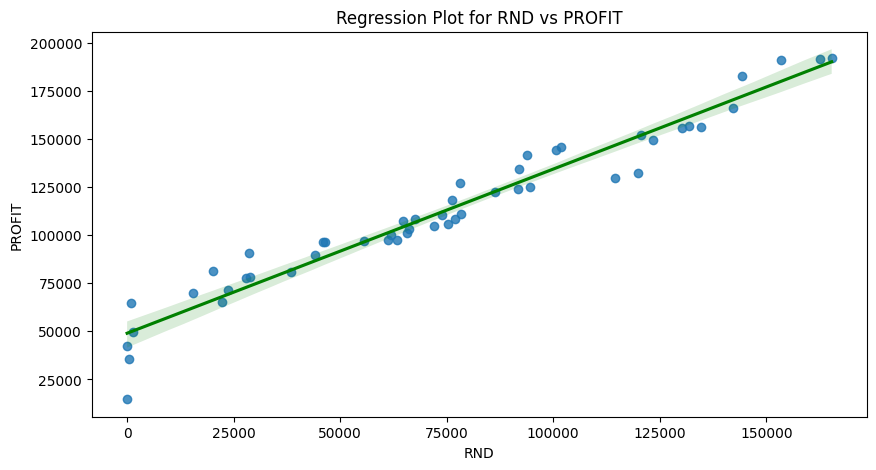

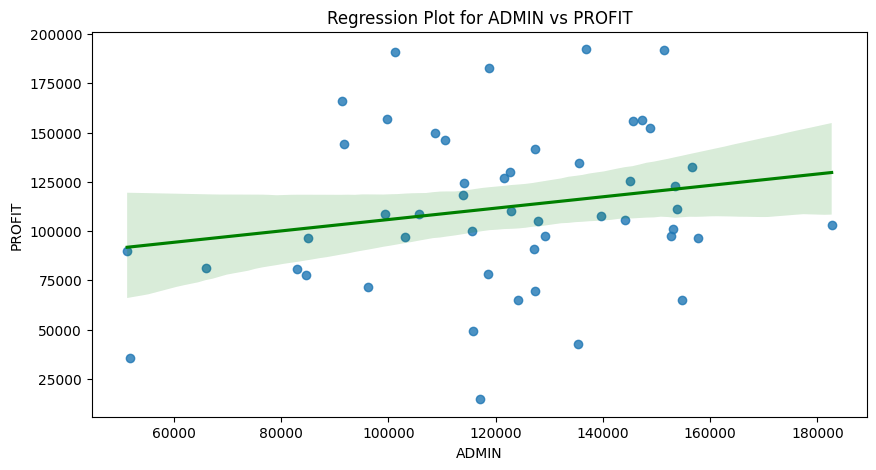

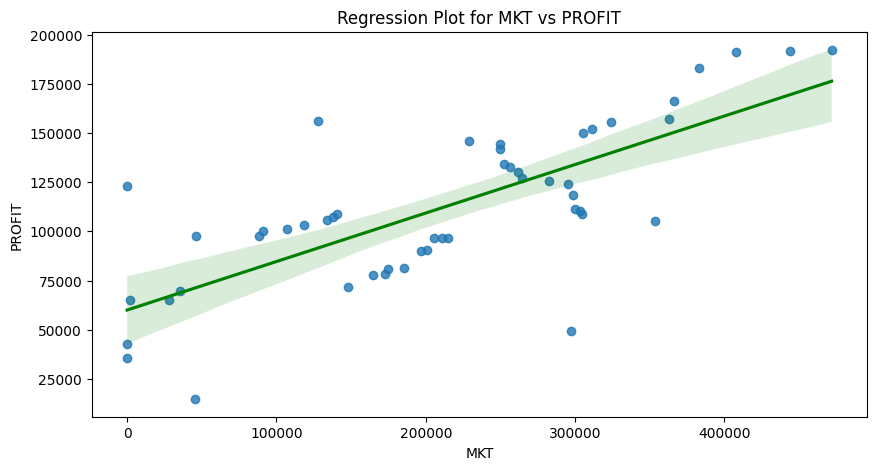

In [34]:
for i in ['RND', 'ADMIN', 'MKT']:
    plt.figure(figsize=(10, 5))
    sns.regplot(data=df, x=i, y='PROFIT', line_kws={'color':'green'})
    plt.title(f'Regression Plot for {i} vs PROFIT')
    plt.show()